In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import wget

In [5]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [6]:
!python -m wget $url 


Saved under laptops (1).csv


In [7]:
laptops = pd.read_csv('laptops.csv')

In [8]:
laptops.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
laptops.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [10]:
laptops.columns = laptops.columns.str.lower().str.replace(' ', '_')

In [11]:
df = laptops[['ram', 'storage', 'screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [12]:
sns.set_style(style='darkgrid')

1.6495877663192549


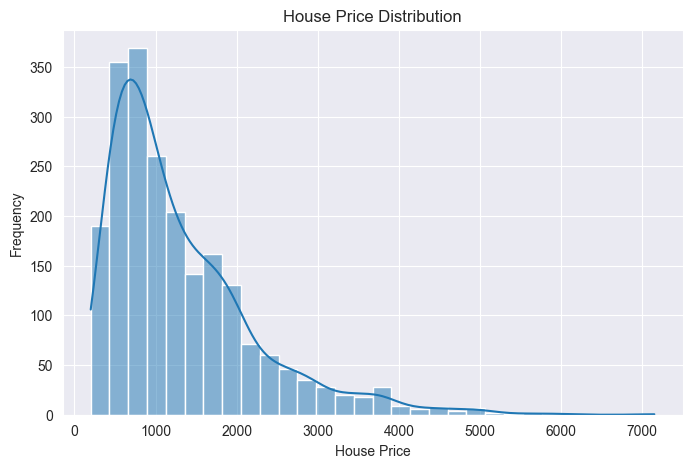

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['final_price'], bins=30, kde=True)
plt.title('House Price Distribution')
plt.xlabel('House Price')
plt.ylabel('Frequency')

skewness =df['final_price'].skew()
print(skewness)

### Question 1
There's one column with missing values. What is it?

In [14]:
print(f'Missing values:\n',df.isnull().sum())

Missing values:
 ram            0
storage        0
screen         4
final_price    0
dtype: int64


### Question 2
What's the median (50% percentile) for variable 'ram'?

In [15]:
median_ram = df['ram'].median()
print('The median (50% percentile) for variable ram = ', median_ram)

The median (50% percentile) for variable ram =  16.0


### Question 3. Filling NAs


With 0

With mean

Both are equally good

In [16]:
df.shape

(2160, 4)

### Question 4
Now let's train a regularized linear regression. </br>
For this question, fill the NAs with 0.</br>
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].</br>
Use RMSE to evaluate the model on the validation dataset.</br>
Round the RMSE scores to 2 decimal digits.</br>
Which r gives the best RMSE?</br>
If there are multiple options, select the smallest r.</br>

Options:

0</br>
0.01</br>
1</br>
10</br>
100</br>

In [17]:
df = df.fillna(value = 0)

In [18]:
df.isna().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)